In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Bandit Simulations
# Let's consider a 10-arm bandit, and suppose the agent plays the bandit machine for 1000 rounds in total
k = 10
T = 1000
# Simulate the true expected reward, r_i, of each arm, based on a standard normal (you can pick any distribution you want)
np.random.seed(1234) #set a seed so the results are reproducible
true_rewards = np.random.normal(size = k)
print(true_rewards)

f"Average reward is {np.mean(true_rewards)}, Best arm reward is {max(true_rewards)}."

[ 0.47143516 -1.19097569  1.43270697 -0.3126519  -0.72058873  0.88716294
  0.85958841 -0.6365235   0.01569637 -2.24268495]


'Average reward is -0.14368349244677692, Best arm reward is 1.4327069684260973.'

In [5]:
def pull(arm_ind):
    return np.random.normal(loc = true_rewards[arm_ind], scale = 1)

# Example, pull on the third arm
pull(2)

2.5827426931459154

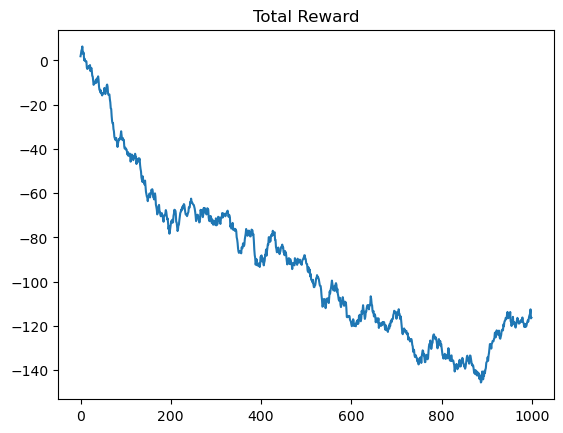

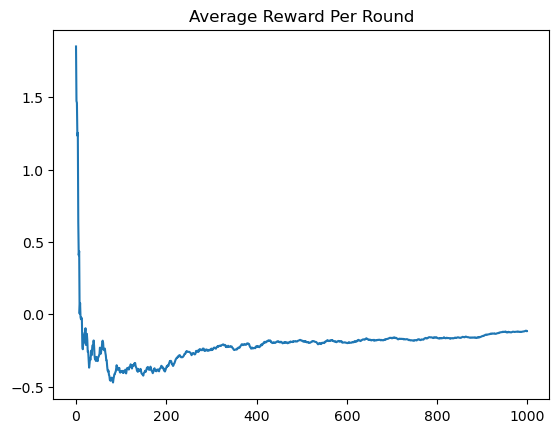

In [7]:
# As a naive baseline, let's try pulling the arms completely randomly
reward_random = []
sumreward_random = []
avereward_random = []
for t in range(T):
    # every time, randomly pull an arm
    arm = np.random.randint(low = 0, high = 10)
    reward_random.append(pull(arm))
    # record sum and average reward up to this round
    sumreward_random.append(np.sum(reward_random))
    avereward_random.append(np.mean(reward_random))

# Let's plot the sum and average reward over 1000 rounds
plt.plot(sumreward_random)
plt.title("Total Reward")
plt.show()

plt.plot(avereward_random)
plt.title("Average Reward Per Round")
plt.show()

In [9]:
#Action value method
def value_est(curr_values, counter, action, reward):
    # curr_values stores the current estimate of Q_t(a)
    # counter keeps a record of how many times each arm has been pulled
    # action and reward are the next action and observed reward
    curr_values[action] = (curr_values[action]*counter[action] + reward) / (counter[action] + 1)
    counter[action] += 1
    return curr_values, counter

curr_values = [0,0,0]  # initial values
counter = [0,0,0]  # initialize counter
for action, reward in [(1,0.5), (0,1), (1,-1)]:
    curr_values, counter = value_est(curr_values, counter, action, reward)
    print(curr_values)

[0, 0.5, 0]
[1.0, 0.5, 0]
[1.0, -0.25, 0]


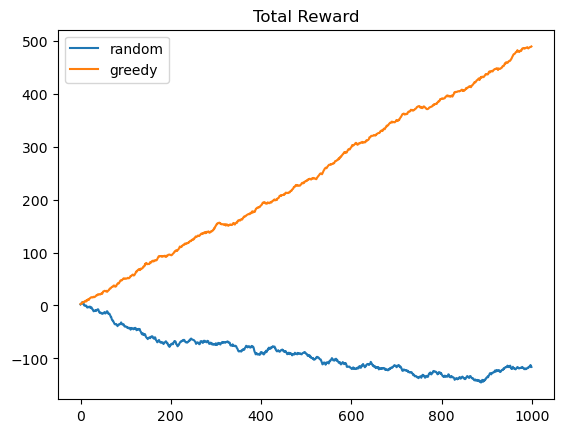

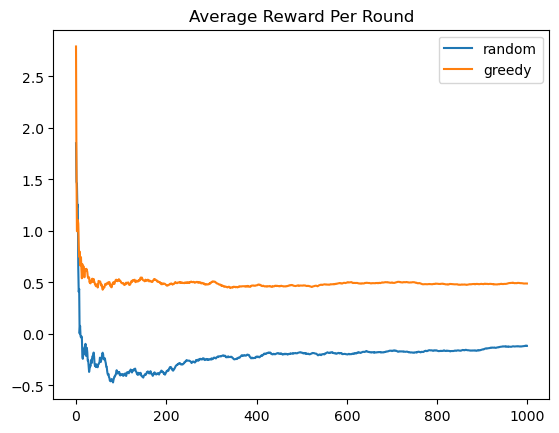

In [11]:
# Greedy strategy
curr_values = [0]*k  # initial values
counter = [0]*k  # initialize counter
reward_greedy = []
sumreward_greedy = []
avereward_greedy = []
for t in range(T):
    # every time, pull the current best arm
    arm = np.argmax(curr_values)
    reward = pull(arm)
    reward_greedy.append(reward)
    # record sum and average reward up to this round
    sumreward_greedy.append(np.sum(reward_greedy))
    avereward_greedy.append(np.mean(reward_greedy))
    # update curr_values
    curr_values, counter = value_est(curr_values, counter, arm, reward)

# Let's plot the sum and average reward over 1000 rounds
plt.plot(sumreward_random)
plt.plot(sumreward_greedy)
plt.title("Total Reward")
plt.legend(["random", "greedy"])
plt.show()

plt.plot(avereward_random)
plt.plot(avereward_greedy)
plt.title("Average Reward Per Round")
plt.legend(["random", "greedy"])
plt.show()

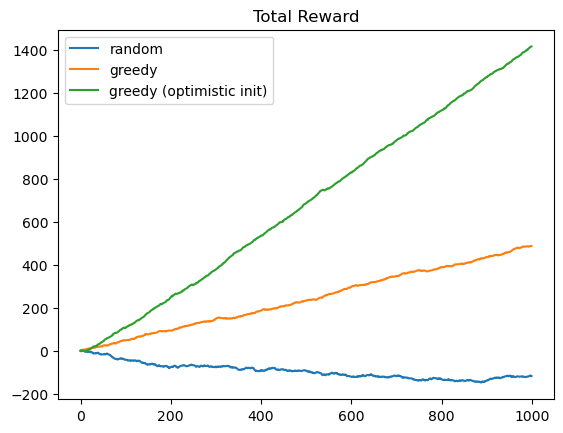

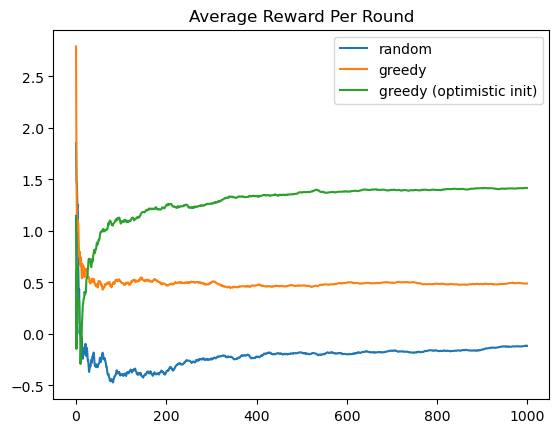

In [13]:
# Greedy strategy with optimistic initialization
curr_values = [2]*k  # optimistic initial values
counter = [0]*k  # initialize counter
reward_greedy_optint = []
sumreward_greedy_optint = []
avereward_greedy_optint = []
for t in range(T):
    # every time, pull the current best arm
    arm = np.argmax(curr_values)
    reward = pull(arm)
    reward_greedy_optint.append(reward)
    # record sum and average reward up to this round
    sumreward_greedy_optint.append(np.sum(reward_greedy_optint))
    avereward_greedy_optint.append(np.mean(reward_greedy_optint))
    # update curr_values
    curr_values, counter = value_est(curr_values, counter, arm, reward)

# Let's plot the sum and average reward over 1000 rounds
plt.plot(sumreward_random)
plt.plot(sumreward_greedy)
plt.plot(sumreward_greedy_optint)
plt.title("Total Reward")
plt.legend(["random", "greedy", "greedy (optimistic init)"])
plt.show()

plt.plot(avereward_random)
plt.plot(avereward_greedy)
plt.plot(avereward_greedy_optint)
plt.title("Average Reward Per Round")
plt.legend(["random", "greedy", "greedy (optimistic init)"])
plt.show()

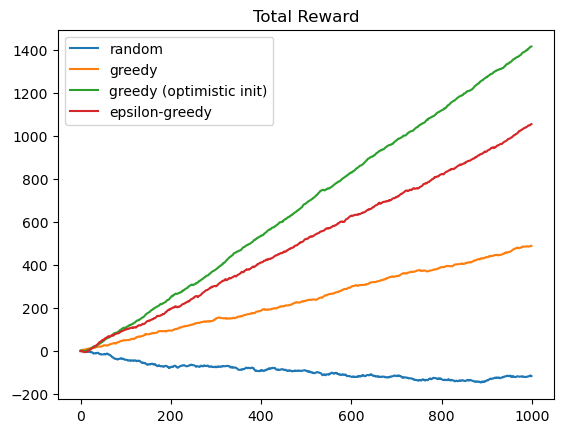

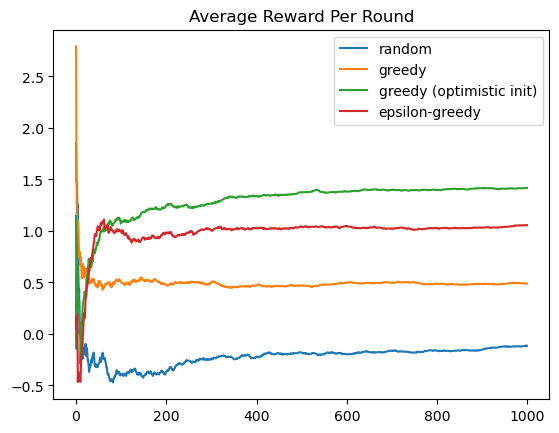

In [15]:
# Epsilon-Greedy strategy
curr_values = [0]*k  # initial values
counter = [0]*k  # initialize counter
eps = 0.2  # force to explore 20% of the time
reward_greedy_eps = []
sumreward_greedy_eps = []
avereward_greedy_eps = []
for t in range(T):
    # current best arm
    arm = np.argmax(curr_values)
    # throw a coin
    explore = np.random.binomial(1, eps)
    if explore:
        # randomly pull another arm
        arm = np.random.choice(np.setdiff1d(range(k), arm))
    reward = pull(arm)
    reward_greedy_eps.append(reward)
    # record sum and average reward up to this round
    sumreward_greedy_eps.append(np.sum(reward_greedy_eps))
    avereward_greedy_eps.append(np.mean(reward_greedy_eps))
    # update curr_values
    curr_values, counter = value_est(curr_values, counter, arm, reward)

# Let's plot the sum and average reward over 1000 rounds
plt.plot(sumreward_random)
plt.plot(sumreward_greedy)
plt.plot(sumreward_greedy_optint)
plt.plot(sumreward_greedy_eps)
plt.title("Total Reward")
plt.legend(["random", "greedy", "greedy (optimistic init)", "epsilon-greedy"])
plt.show()

plt.plot(avereward_random)
plt.plot(avereward_greedy)
plt.plot(avereward_greedy_optint)
plt.plot(avereward_greedy_eps)
plt.title("Average Reward Per Round")
plt.legend(["random", "greedy", "greedy (optimistic init)", "epsilon-greedy"])
plt.show()

In [17]:
#UCB function
def ucb_calc(curr_values, t, counter, c):
    ucb_values = [0]*len(curr_values)
    for i in range(k):
        if counter[i] == 0:
            ucb_values[i] = curr_values[i] + 9999.99   # some very large number to represent "infinity"
        else:
            ucb_values[i] = curr_values[i] + c * np.sqrt(np.log(t) / counter[i])
    return ucb_values

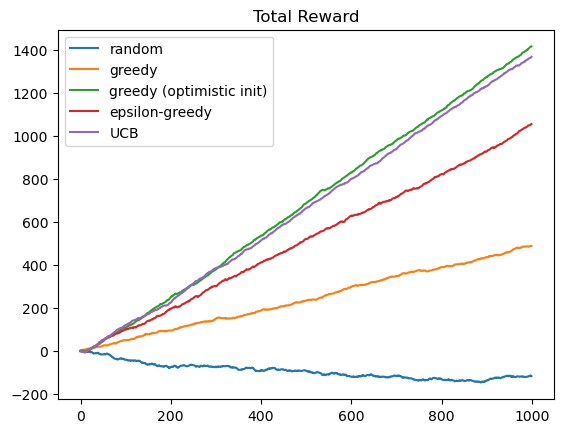

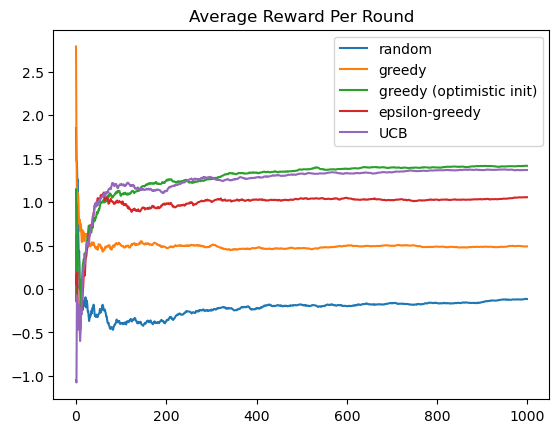

In [19]:
# UCB
curr_values = [0]*k  # initial values
counter = [0]*k  # initialize counter
c = 0.1  # mildly exploration
#c = 10.0  # very aggressive exploration
reward_ucb = []
sumreward_ucb = []
avereward_ucb = []
for t in range(T):
    # do the UCB value adjustments
    ucb_values = ucb_calc(curr_values, t+1, counter, c)
    # current best arm
    arm = np.argmax(ucb_values)    
    reward = pull(arm)
    reward_ucb.append(reward)
    # record sum and average reward up to this round
    sumreward_ucb.append(np.sum(reward_ucb))
    avereward_ucb.append(np.mean(reward_ucb))
    # update curr_values
    curr_values, counter = value_est(curr_values, counter, arm, reward)

# Let's plot the sum and average reward over 1000 rounds
plt.plot(sumreward_random)
plt.plot(sumreward_greedy)
plt.plot(sumreward_greedy_optint)
plt.plot(sumreward_greedy_eps)
plt.plot(sumreward_ucb)
plt.title("Total Reward")
plt.legend(["random", "greedy", "greedy (optimistic init)", "epsilon-greedy", "UCB"])
plt.show()

plt.plot(avereward_random)
plt.plot(avereward_greedy)
plt.plot(avereward_greedy_optint)
plt.plot(avereward_greedy_eps)
plt.plot(avereward_ucb)
plt.title("Average Reward Per Round")
plt.legend(["random", "greedy", "greedy (optimistic init)", "epsilon-greedy", "UCB"])
plt.show()

In [21]:
def softmax(x):
    return np.exp(x)/sum(np.exp(x))

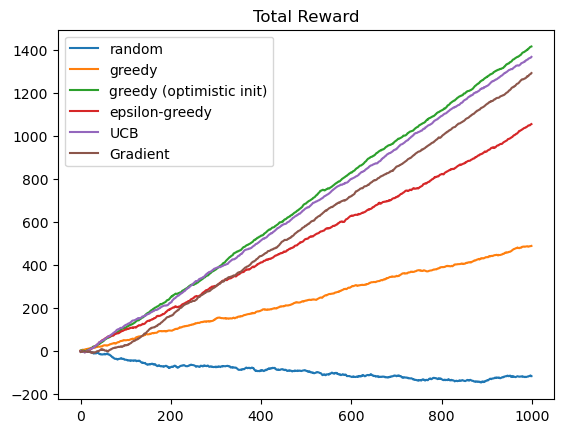

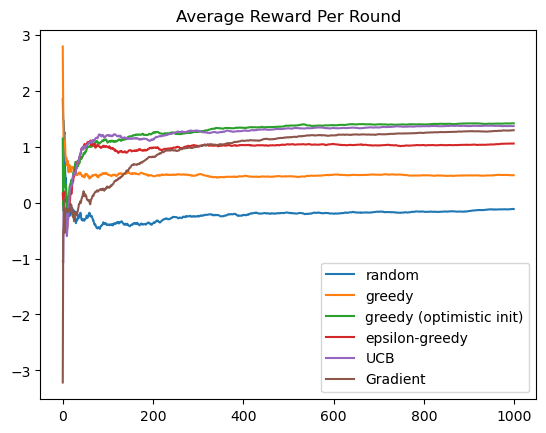

In [23]:
# Gradient method
H = [0]*k  # initial preference scores. Doesn't matter that much how you initialize them, as long as different actions have the same initial score
prob = softmax(H)  # initialize probabilities
alpha = 0.1  # step size

reward_gradient = []
sumreward_gradient = []
avereward_gradient = []
for t in range(T):
    # choose an arm based on probabilities
    arm = np.random.choice(range(k), p = prob)    
    reward = pull(arm)
    reward_gradient.append(reward)
    avereward = np.mean(reward_gradient)
    # record sum and average reward up to this round
    sumreward_gradient.append(np.sum(reward_gradient))
    avereward_gradient.append(avereward)
    # update prob
    for i in range(k):
        if i == arm:
            H[i] = H[i] + alpha*(reward - avereward)*(1-prob[i])
        else:
            H[i] = H[i] - alpha*(reward - avereward)*prob[i]
    prob = softmax(H)

# Let's plot the sum and average reward over 1000 rounds
plt.plot(sumreward_random)
plt.plot(sumreward_greedy)
plt.plot(sumreward_greedy_optint)
plt.plot(sumreward_greedy_eps)
plt.plot(sumreward_ucb)
plt.plot(sumreward_gradient)
plt.title("Total Reward")
plt.legend(["random", "greedy", "greedy (optimistic init)", "epsilon-greedy", "UCB", "Gradient"])
plt.show()

plt.plot(avereward_random)
plt.plot(avereward_greedy)
plt.plot(avereward_greedy_optint)
plt.plot(avereward_greedy_eps)
plt.plot(avereward_ucb)
plt.plot(avereward_gradient)
plt.title("Average Reward Per Round")
plt.legend(["random", "greedy", "greedy (optimistic init)", "epsilon-greedy", "UCB", "Gradient"])
plt.show()